In [1]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("aaronschlegel/petfinder-animal-shelters-database")

print("Path to dataset files:", path)

print("Files in dataset directory:", os.listdir(path))

csv_file = os.path.join(path, "petfinder_shelters.csv")
df = pd.read_csv(csv_file)

df.head()


c:\Users\romeo\anaconda3\envs\animal_shelter_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\romeo\.cache\kagglehub\datasets\aaronschlegel\petfinder-animal-shelters-database\versions\4
Files in dataset directory: ['petfinder_shelters.csv']


,address1,address2,city,country,email,id,latitude,longitude,name,phone,state,zip
0,195 State Road,NaN,Kittery,US,AdoptionsKAH@gmail.com,ME118,43.0899,-70.7415,Kittery Animal Hospital and Creature Comforts LLC,(207) 439-4158,ME,3904
1,94 Grove Road,NaN,Rye,US,lgrovefarm@aol.com,NH81,42.9885,-70.8282,Lilac Groves Pampered Pups,603-964-1475,NH,3870
2,NaN,NaN,Rye,US,Rescue@NNEwestierescue.org,NH140,42.9885,-70.8282,Northern New England Westie Rescue Inc,NaN,NH,3870
3,104 Portsmouth Avenue,P.O. Box 196,Stratham,US,info@nhspca.org,NH31,43.0028,-70.9212,NHSPCA,603-772-2921,NH,3885
4,NaN,NaN,York,US,thegratefuldoganimalrescue@gmail.com,ME158,43.1502,-70.6281,The Grateful Dog Animal Rescue,NaN,ME,3909


In [2]:
df.describe()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address1   5630 non-null   object 
 1   address2   836 non-null    object 
 2   city       10136 non-null  object 
 3   country    10136 non-null  object 
 4   email      9872 non-null   object 
 5   id         10136 non-null  object 
 6   latitude   10136 non-null  float64
 7   longitude  10136 non-null  float64
 8   name       10136 non-null  object 
 9   phone      7397 non-null   object 
 10  state      10136 non-null  object 
 11  zip        10136 non-null  object 
dtypes: float64(2), object(10)
memory usage: 950.4+ KB


Index(['address1', 'address2', 'city', 'country', 'email', 'id', 'latitude',
       'longitude', 'name', 'phone', 'state', 'zip'],
      dtype='object')

Cleaning Dataset

In [3]:
print(df.isnull().sum())  # Check for missing values in each column

address1     4506
address2     9300
city            0
country         0
email         264
id              0
latitude        0
longitude       0
name            0
phone        2739
state           0
zip             0
dtype: int64


Important to check if latitute/longitude has any missing rows since they won't be mappable. Output shows that zip and latitude/longitude does not have any nulls.

state
CA    1029
TX     820
FL     546
NY     515
OH     410
NJ     378
PA     374
IL     355
MI     346
NC     343
Name: count, dtype: int64


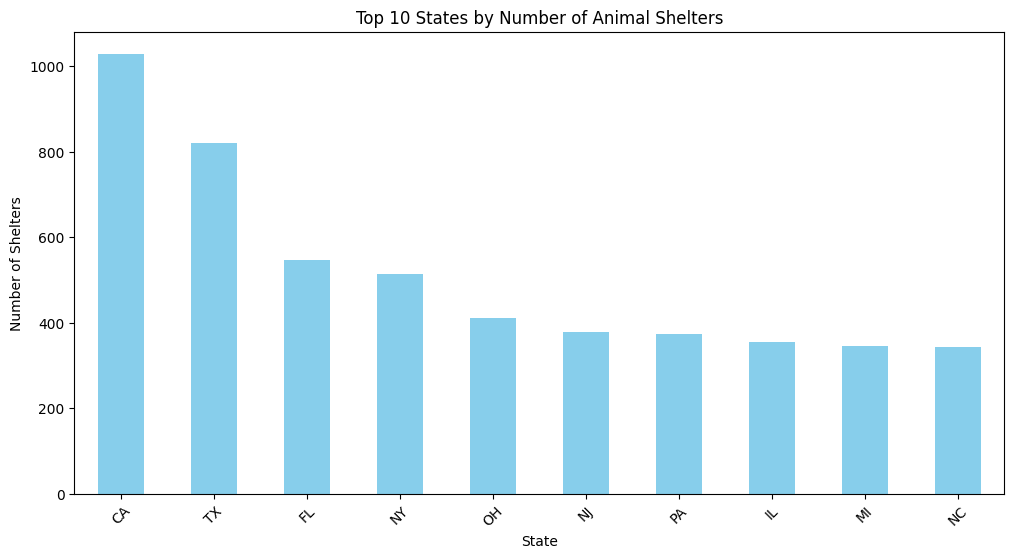

In [4]:
import matplotlib.pyplot as plt

state_counts = df['state'].value_counts()

print(state_counts.head(10))  # Print the top 10 states with the most shelters

plt.figure(figsize=(12, 6))
state_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Number of Animal Shelters')
plt.xlabel('State')
plt.ylabel('Number of Shelters')
plt.xticks(rotation=45)
plt.show()

city
Houston        75
Los Angeles    57
Phoenix        56
New York       54
Dallas         46
Richmond       38
Las Vegas      36
Portland       33
Springfield    32
Chicago        32
Name: count, dtype: int64


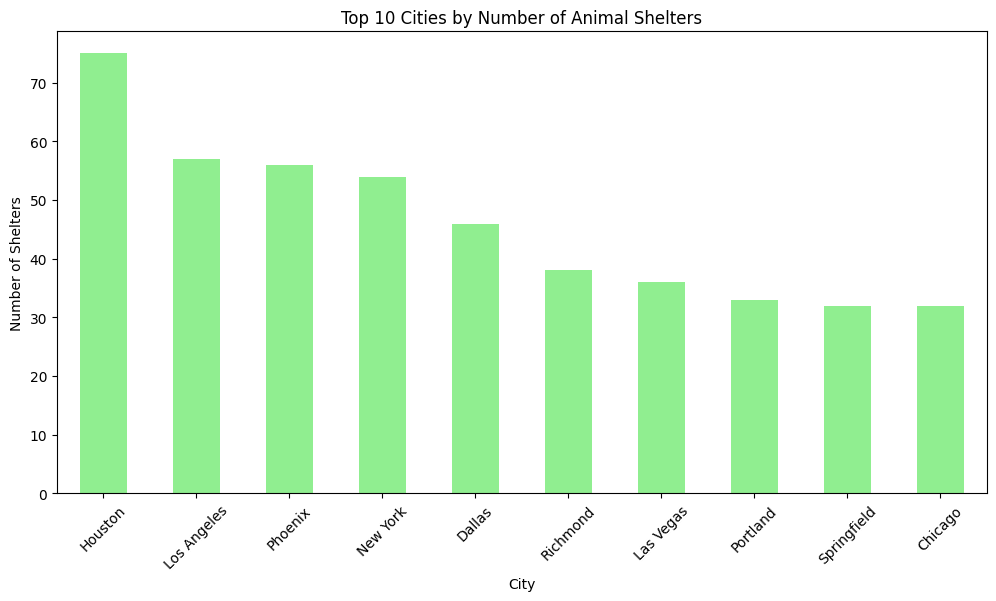

In [5]:
city_counts = df['city'].value_counts()
print(city_counts.head(10))  # Print the top 10 cities with the most shelters

plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', color='lightgreen')  
plt.title('Top 10 Cities by Number of Animal Shelters')
plt.xlabel('City')
plt.ylabel('Number of Shelters')
plt.xticks(rotation=45)
plt.show()

**Canadian Shelters**
I want to filter strictly for Canadian shelters also, since that is where I live.      

In [6]:
df_canada = df[df['country'] == "CA"]

print("Number of shelters in Canada:", len(df_canada))
df_canada.head()

Number of shelters in Canada: 322


,address1,address2,city,country,email,id,latitude,longitude,name,phone,state,zip
435,NaN,NaN,Stanstead,CA,frontieranimalsociety@gmail.com,QC81,45.016667,-72.083333,Frontier Animal Society,(819) 876-7747,QC,J0B 3E0
535,"1139, boul. Queen Victoria",NaN,Sherbrooke,CA,infos@spaestrie.qc.ca,QC44,45.419000,-71.921000,SPA de L'Estrie,(819) 821-4727,QC,J1j 4N5
555,409 rue Riviere,NaN,Cowansville,CA,info@spadescantons.com,QC83,45.200000,-72.750000,SPA des Cantons,450-263-1117,QC,J2K 1N4
662,NaN,NaN,St-Valerien,CA,caramelle@telupton.com,QC45,45.566667,-72.716667,Fondation Caramel,(450) 549-2935,QC,J0H 2B0
718,NaN,NaN,Beloeil,CA,info@lesfelinsdelavallee.com,QC82,45.566667,-73.200000,Les Felins de la Vallee,(438) 832-4287,QC,J3G 5N1


state
ON    145
BC     61
QC     36
AB     30
MB     19
SK     16
NS      7
NB      5
NT      3
Name: count, dtype: int64


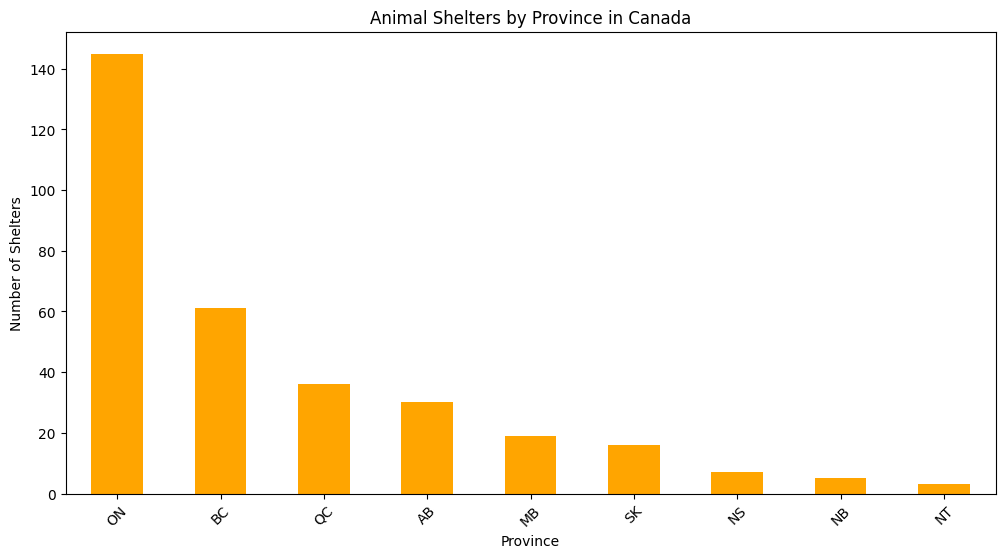

In [7]:
province_counts = df_canada['state'].value_counts()
print(province_counts)

plt.figure(figsize=(12, 6))
province_counts.plot(kind='bar', color='orange')
plt.title('Animal Shelters by Province in Canada')
plt.xlabel('Province')
plt.ylabel('Number of Shelters')
plt.xticks(rotation=45)
plt.show()

city
Toronto        15
Winnipeg       15
Montreal        9
Hamilton        8
Ottawa          8
Vancouver       6
Calgary         5
Saskatoon       5
Mississauga     5
London          5
Name: count, dtype: int64


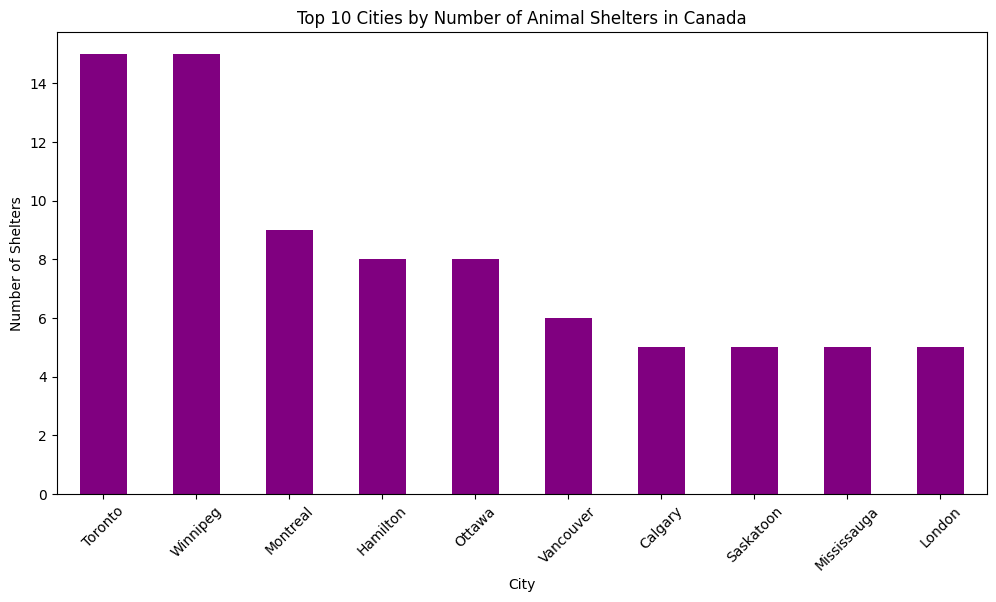

In [8]:
canadian_cities = df_canada['city'].value_counts()
print(canadian_cities.head(10))

plt.figure(figsize=(12, 6))
canadian_cities.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Cities by Number of Animal Shelters in Canada')
plt.xlabel('City')
plt.ylabel('Number of Shelters')
plt.xticks(rotation=45)
plt.show()

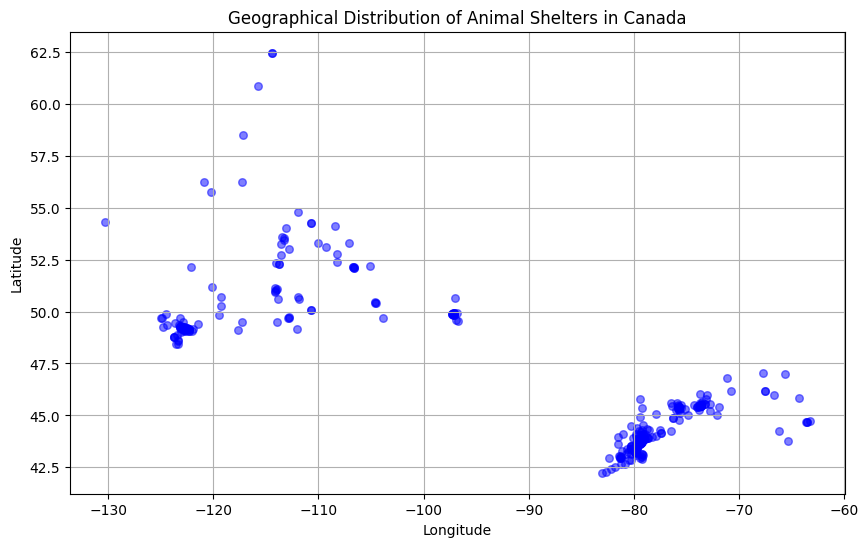

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df_canada['longitude'], df_canada['latitude'], alpha=0.5, s=30, c='blue')
plt.title('Geographical Distribution of Animal Shelters in Canada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Interactive Map**
Creating an interactive map using folium

In [10]:
import folium
import webbrowser

canada_center = [56.1304, -106.3468]
shelter_map = folium.Map(location=canada_center, zoom_start=4)

for _, row in df_canada.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        popup=row["name"],
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(shelter_map)

# Save the map
file_path = "canadian_animal_shelters_map.html"
shelter_map.save(file_path)

# Open it automatically in the browser
webbrowser.open(file_path)


True